Apa itu Jaringan Saraf Tiruan (JST)?

![alt text](https://cdn-images-1.medium.com/max/1200/1*-teDpAIho_nzNShRswkfrQ.gif)

Sebuah JST terbuat dari banyak "**neuron**" yang saling berhubungan.

Setiap neuron (saraf) mengambil beberapa bilangan desimal float (misalnya 1.0, 0.5, -1.0) dan mengalikannya dengan beberapa bilangan desimal float lainnya (misalnya 0.7, 0.6, 1.4) yang dikenal sebagai **weight (bobot)** (1.0 * 0.7 = 0.7, 0.5 * 0,6 = 0,3, -1.0 * 1,4 = -1.4). 

Weight bertindak sebagai mekanisme  untuk memfokuskan neuron tersebut pada input tertentu, atau mengabaikan input tertentu. 

Weight dari dari input-input tersebut kemudian dijumlahkan (misalnya 0,7 + 0,3 + -1,4 = -0,4) bersamaan juga dijumlahkan dengan nilai **bias** (misalnya -0,4 + ** -0,1 ** = -0,5). Menghasilkan "**nilai penjumlahan (x)**".

Salah satu fitur dalam Jaringan Saraf Tiruan adalah Activation Function. Namun sebelum kita membahas` Activation Function`, kita terlebih dahulu harus berkenalan dengan `Linear Regreesion`.

## **Linear Regression**

Sebelum memulai, upload dulu file 'week15data.txt' ke google colab kalian masing-masing.

In [3]:
# upload file yang sudah di download
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving week15data.txt to week15data.txt


In [4]:
# Setelah di upload, coba lihat isi dari folder Anda menggunakan kode dibawah ini:

!ls

# Jika sudah ter upload, nama file yang Anda upload akan terlihat dibawah ini

sample_data  week15data.txt


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Import data kedalam sebuah array NumPy
data = np.genfromtxt('week15data.txt', delimiter=',')


In [6]:
data.shape

(47, 3)

In [7]:
# Ekstrak kolom pertama dari data tersebut ke dalam sebuah variabel baru x1 (ukuran rumah dalam ukuran square feet)
x1 = data[:,0]

# Ekstrak kolom kedua dari data tersebut ke dalam sebuah variabel baru x2 (jumlah kamar tidur)
x2 = data[:,1]

# Ekstrak kolom ketiga dari data tersebut ke dalam sebuah variabel baru y (harga rumah)
y = data[:,2]

In [8]:
# coba kita lihat isi variabel x1
x1
# coba lihat isi x2 dan y!

array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380.,
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

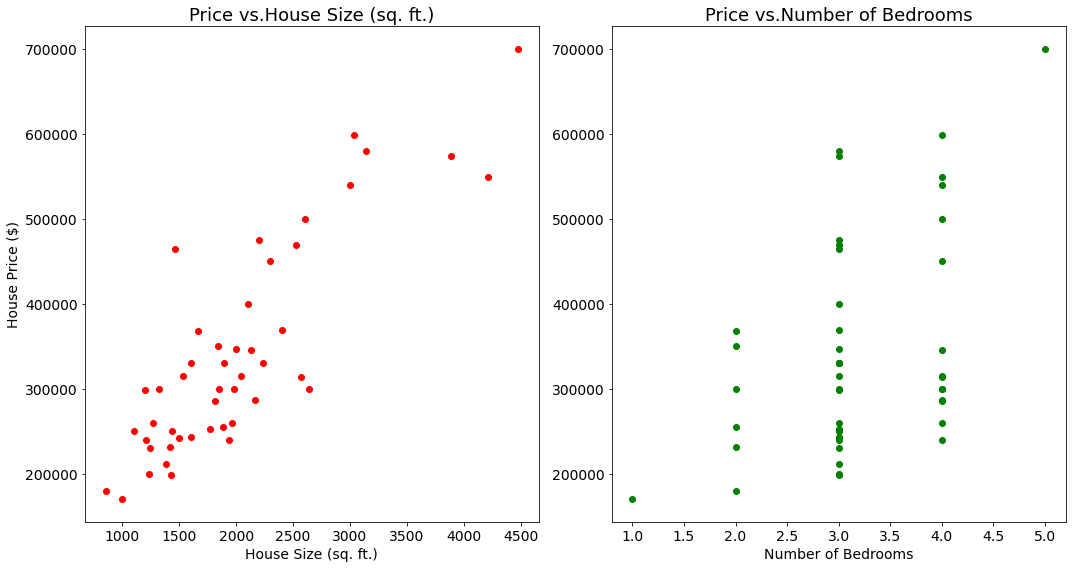

In [9]:
# Plot kan setiap variabel penjelas tersebut diatas satu sama lain

xlabels = ['House Size (sq. ft.)', 'Number of Bedrooms']
colors = ['red', 'green']
fig, axs = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 8)


for i, ax in enumerate(axs):
    ax.scatter(data[:,i], y, c=colors[i])
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_title('Price vs.' + xlabels[i], fontsize=18)
    if i ==0:
        ax.set_ylabel('House Price ($)', fontsize=14)
    ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

Dari kedua hasil plot diatas, kita dapat mengamati bahwa ada relasi positif antara masing-masing variabel. Namun apakah benar? Bagaimana kita bisa mengkonfirmasi kebenaran tersebut dengan lebih detil menggunakan angka?

 Metode apa yang dapat kita gunakan untuk meng kuantifikasi (mengukur) relasi antar variabel tersebut? Salah satu metodenya adalah dengan regresi linier, yang akan kita terapkan menggunakan `package scipy` dalam Python.


Gunakan fungsi `linregress` dengan memasukkan input array x1 dan y:

In [10]:
xone_params = stats.linregress(x1, y)
xtwo_params = stats.linregress(x2, y)

Hasilnya adalah sebuah objek `LinregressResult` yang terdiri dari `Slope`, `y-intercept`, `r-value`, `p-value`, dan `standard error`

In [11]:
# melihat hasil nya:
xone_params

LinregressResult(slope=134.52528772024132, intercept=71270.49244872911, rvalue=0.8549875928781253, pvalue=2.0272680958766845e-14, stderr=12.164967291909832)

Objek `LinregressResult` untuk `x2-y` regresi:

In [12]:
# LinregressResult object for x2-y regression
xtwo_params

LinregressResult(slope=72669.64776357819, intercept=110034.4145367415, rvalue=0.4422611170489722, pvalue=0.0018546425388804454, stderr=21968.75515494713)

Keluarkan `slope` dan nilai `intercept` dari masing-masing objek ke dalam sebuah variabel baru:

In [13]:
xone_slope = xone_params[0]
xone_yint = xone_params[1]

xtwo_slope = xtwo_params[0]
xtwo_yint = xtwo_params[1]

# Coba cek masing-masing nilai tersebut!

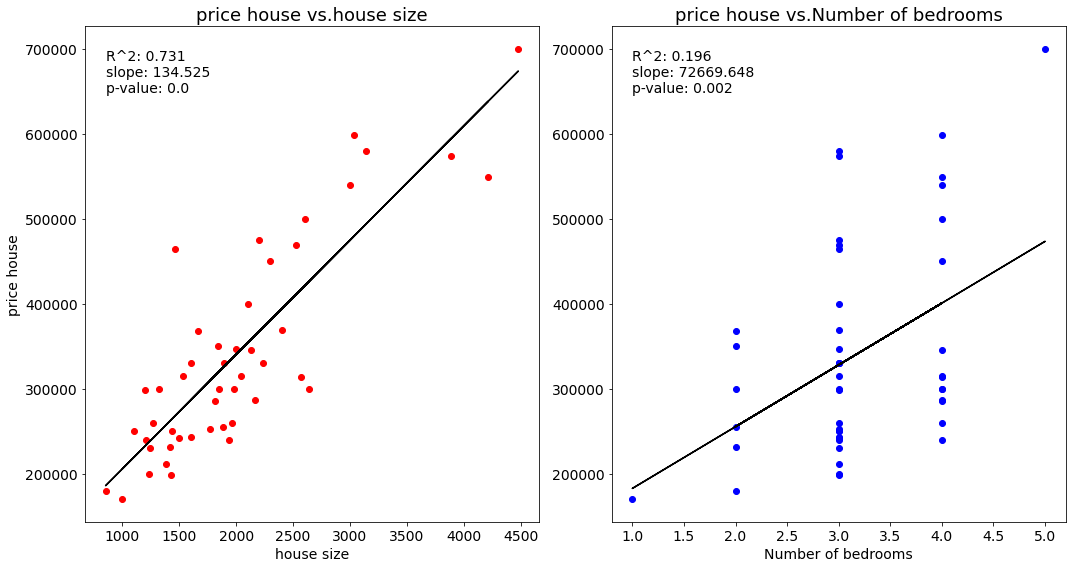

In [15]:
# Membuat array NumPy baru dari nilai fitted y untuk setiap relasi
ys_fit_one = xone_yint + xone_slope * x1
ys_fit_two = xtwo_yint + xtwo_slope * x2

# Menempatkan array-array tersebut ke dalam sebuah list untuk dihitung
ys_fits = [ys_fit_one, ys_fit_two]
params = [xone_params, xtwo_params]

# Menge - plot nilai-nilai di atas scatter plot untuk setiap relasinya
# Menge - plot setiap masing-masing variabel (variabel penjelas terhadap variabel respons)
xlabels = ['house size', 'Number of bedrooms']
fig, axs = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15, 8)


for i, ax in enumerate(axs):
    ax.scatter(data[:, i], y, c=colors[i])
    ax.plot(data[:, i], ys_fits[i], c='black')
    ax.set_xlabel(xlabels[i], fontsize=14)
    ax.set_title('price house vs.' + xlabels[i], fontsize=18)
    if i ==0:
        ax.set_ylabel('price house', fontsize=14)
    ax.tick_params(labelsize=14)
    
    slope = str(round(params[i][0],3))
    r_squared = str(round(params[i][2] ** 2,3))
    p_value = str(round(params[i][3],3))
    
    ax.text(data[:, i].min(), y.max(),
            'R^2: ' + r_squared + '\nslope: ' + slope + '\np-value: ' + p_value,
            fontsize=14, verticalalignment='top')
    
plt.tight_layout()
plt.show()

Merujuk dua grafik diatas, semakin banyak titik-titik yang mengenai garis hitam, maka semakin besar relasi antara variabel yang di validasi.

Dari grafik diatas, bisa kita ketahui bahwa ternyata relasi antara `harga rumah dan ukuran rumah` itu lebih terbukti dibandingkan relasi antara `harga rumah dan jumlah kamar tidur`.

### **$r$ (Pearson's Correlation Coefficient) dan $R^2$**
Coba perhatikan nilai $R^2$ yang ada di pojok kiri dua grafik diatas.

Nilai $R^2$ grafik relasi antara `harga rumah dan ukuran rumah` adalah = 0.731.

Nilai $R^2$ grafik relasi antara `harga rumah dan jumlah kamar tidur` adalah = 0.196.

Nilai $R^2$ disebut juga sebagai Pearson Correlation Coefficient, dan kadang-kadang juga bisa dikenali dengan tanda simbol $\rho$. Nilai $R^2$ inilah yang menunjukkan ukuran (kuantifikasi) kesamaan antara varians dari dua variabel. Dengan kata lain, $R^2$ menunjukkan hasil ukuran seberapa mirip perubahan satu variabel dalam arah dan laju yang sama dengan variabel yang lain.

Semakin nilai $R^2$ mendekati angka = 1.0, maka dua variabel tersebut memiliki hubungan yang kuat.

Nilai $R^2$ = 0.0, maka hubungan kedua variabel tersebut tidak kuat.

Dan jika nilai $R^2$ = -1.0, maka dua variabel tersebut tidak memiliki hubungan sama sekali. 

Jika dilihat dari dua grafik diatas, nilai $R^2$ `harga rumah dan ukuran rumah` adalah = 0.731, artinya, variabel ukuran rumah berpengaruh sebesar `73%` terhadap variabel harga rumah. Sedangkan sisanya (100% - 73% = 27%) dipengaruhi oleh variabel lain diluar model regresi ini.

Dilain pihak, nilai $R^2$ `harga rumah dan jumlah kamar tidur` adalah = 0.196, artinya, variabel jumlah kamar tidur hanya berpengaruh sebesar `19% saja` terhadap variabel harga rumah. Berarti korelasi antara dua variabel tersebut ada, namun sangat kecil.


## **Activation Function (Fungsi Aktivasi)**

**Nilai penjumlahan (x)** sekarang ditransformasikan menjadi **nilai keluaran (y)** sesuai dengan **activation function (fungsi aktivasi)** neuron (y = **f**(x)). Beberapa fungsi aktivasi yang terkenal dapat dilihat di bawah ini:
![alt text](https://cdn-images-1.medium.com/max/1600/1*RD0lIYqB5L2LrI2VTIZqGw.png)

## **Latihan**

1. Buatlah dataset baru dalam bentuk notepad txt. Nama dataset nya adalah ikan di pasar. Dataset baru tersebut terdiri dari 3 variabel:

> `a. berat (dalam unit gram)`

> `b. jumlah tulang (dalam unit satuan)`

> `c. harga (dalam unit mata uang Rupiah)`

2. Kemudian isikan dataset tersebut sejumlah 50 data.
3. Jangan lupa buatkan metadata dataset tersebut.
4. Menggunakan dataset tersebut, Anda hendak mengetahui korelasi antara `berat ikan` dan `jumlah tulang ikan` terhadap `harga ikan`. Jelaskan kemudian apa kesimpulan yang Anda dapat dengan menjawab pertanyaan dibawah ini:

> `a. berapa nilai $R^2$ untuk variabel berat dan harga?`

> `b. berapa nilai $R^2$ untuk variabel jumlah tulang dan harga?`

KIRIMKAN KE EMAIL SAYA: zakiulfahmi.fst@ar-raniry.ac.id
dengan format: MK_HARI_NAMA_LATIHAN_01


